In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Reshape, TimeDistributed, Flatten, RepeatVector
from keras.layers import LSTM
from keras.layers.convolutional import Conv3D, Conv2D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras_contrib.losses import DSSIMObjective

Using TensorFlow backend.
/home/volkovskyi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/t

In [2]:
data = np.load("mnist_test_seq.npy")
data = np.swapaxes(data, 0, 1)

data_test_input = data[100:10000, :10, :, :]
data_test_output = data[100:10000, :10, :, :]

data_actual_test_input = data[0:100, :10, :, :]
data_actual_test_output = data[0:100, :10, :, :]

plt.imshow(data_test_input[4][0])
plt.colorbar()
plt.show()

#Scaling values between -1 and 1
data_test_input = (data_test_input) / 255.0
data_test_output = (data_test_output) / 255.0
data_actual_test_input = (data_actual_test_input) / 255.0
data_actual_test_output = (data_actual_test_output) / 255.0

#Adding Channels of dimension 1 IMPORTANT if using CNNs
train_in = np.expand_dims(data_test_input, axis=4)
train_out = np.expand_dims(data_test_output, axis=4)
test_in = np.expand_dims(data_actual_test_input, axis=4)
test_out = np.expand_dims(data_actual_test_output, axis=4)

print(train_in.shape)
print(train_out.shape)

# output_frames.shape
# output_frames = np.squeeze(output_frames, axis=1)
# test_output_frames = np.squeeze(test_output_frames, axis=1)
# plt.plot(test_output_frames[0])
# plt.show()

# output_frames.shape
# plt.imshow(np.squeeze(test_output_frames[1], axis=2))
# plt.show()

(9900, 10, 64, 64, 1)
(9900, 10, 64, 64, 1)


In [ ]:
plt.imshow(data_test_input[4][0])
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(data_test_input[4][0])
plt.colorbar()
plt.show()

In [3]:

#ENCODER
model = Sequential()
model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=2, kernel_size=(3, 3),
                   padding='same', return_sequences=False))
model.add(BatchNormalization())

#Add dense layers??

out_size = model.layers[-1].output_shape
num_repeat = 10

model.add(Flatten()) #encoded


#DECODER
model.add(RepeatVector(num_repeat))
model.add(Reshape(tuple([num_repeat]) + out_size[1:]))

model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
model.add(BatchNormalization())

model.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   padding='same', return_sequences=True, activation='sigmoid'))



#Have model return one image with one channel/filter
#Output shape = (batch_size, 1, 64, 64, 1)
# model.add(BatchNormalization())

# model.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
#                activation='sigmoid',
#                padding='same', data_format='channels_last'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 10, 64, 64, 8)     2624      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 64, 64, 8)     32        
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 10, 64, 64, 16)    13888     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 64, 64, 16)    64        
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 64, 64, 2)         1304      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 2)         8         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

In [5]:
print(train_out.shape)

(9900, 10, 64, 64, 1)


Epoch: 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
9900/9900 [==============================] - 175s 18ms/step - loss: 0.0319


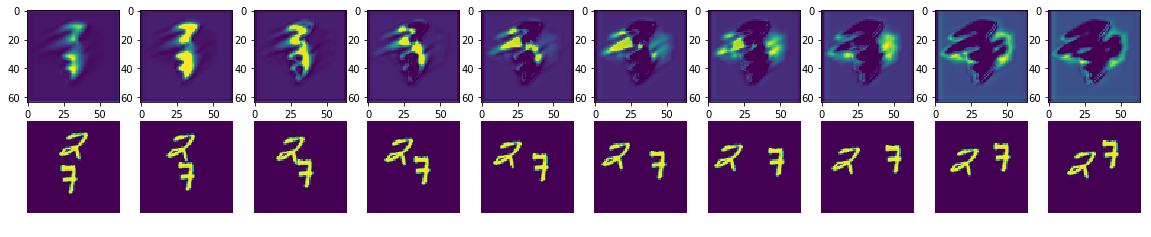

Epoch: 2
Epoch 1/1
9900/9900 [==============================] - 167s 17ms/step - loss: 0.0174


<Figure size 432x288 with 0 Axes>

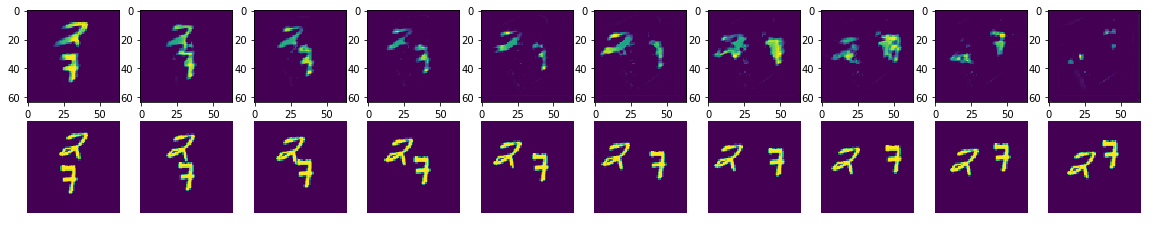

Epoch: 3
Epoch 1/1
9900/9900 [==============================] - 168s 17ms/step - loss: 0.0126


<Figure size 432x288 with 0 Axes>

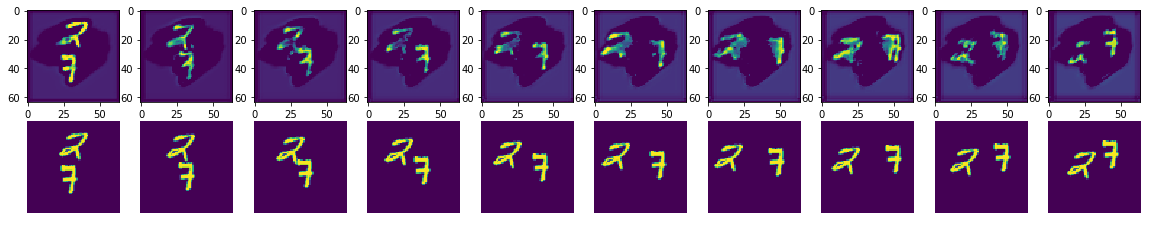

Epoch: 4
Epoch 1/1
9900/9900 [==============================] - 168s 17ms/step - loss: 0.0093


<Figure size 432x288 with 0 Axes>

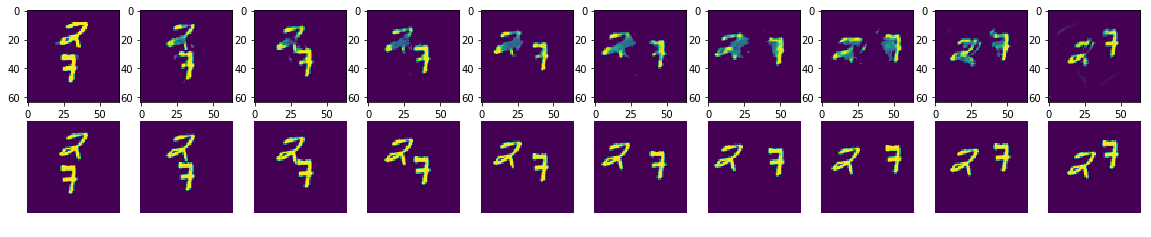

Epoch: 5
Epoch 1/1
9900/9900 [==============================] - 168s 17ms/step - loss: 0.0077


<Figure size 432x288 with 0 Axes>

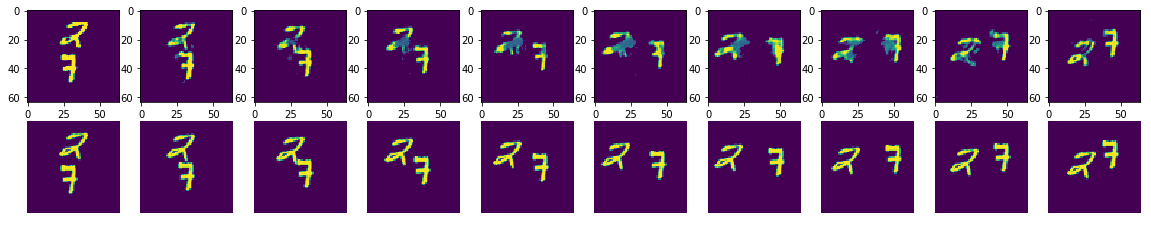

Epoch: 6
Epoch 1/1
9900/9900 [==============================] - 167s 17ms/step - loss: 0.0068


<Figure size 432x288 with 0 Axes>

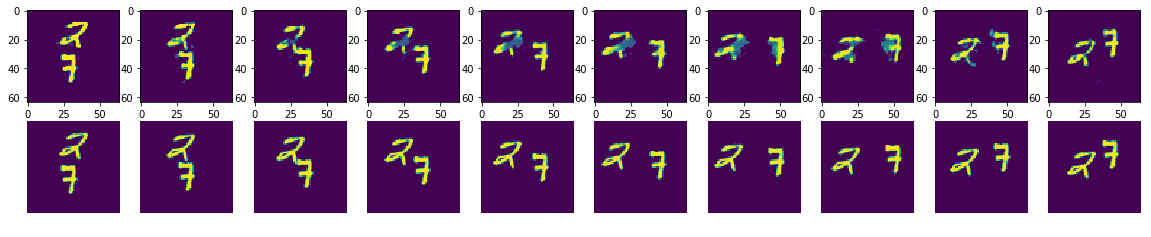

Epoch: 7
Epoch 1/1
9900/9900 [==============================] - 167s 17ms/step - loss: 0.0061


<Figure size 432x288 with 0 Axes>

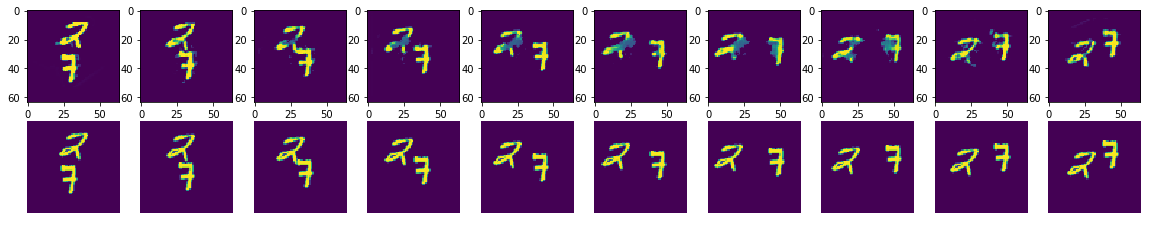

Epoch: 8
Epoch 1/1
9900/9900 [==============================] - 167s 17ms/step - loss: 0.0056


<Figure size 432x288 with 0 Axes>

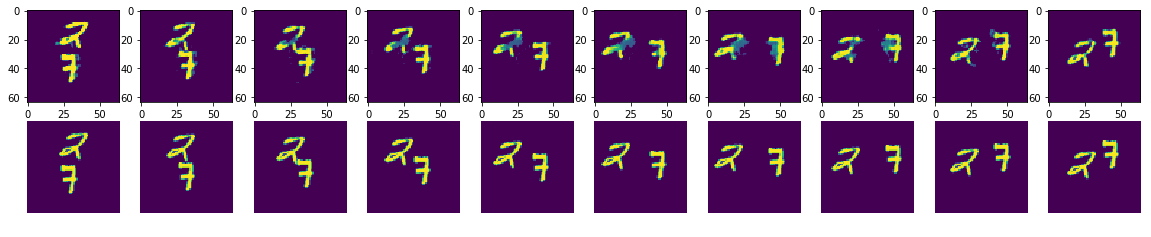

Epoch: 9
Epoch 1/1
9900/9900 [==============================] - 166s 17ms/step - loss: 0.0053


<Figure size 432x288 with 0 Axes>

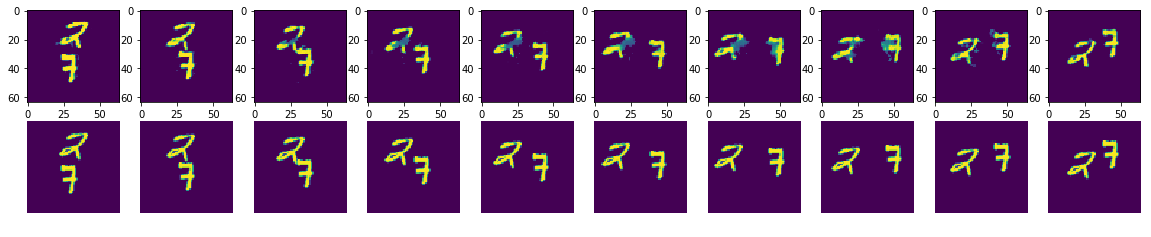

Epoch: 10
Epoch 1/1
9900/9900 [==============================] - 168s 17ms/step - loss: 0.0050


<Figure size 432x288 with 0 Axes>

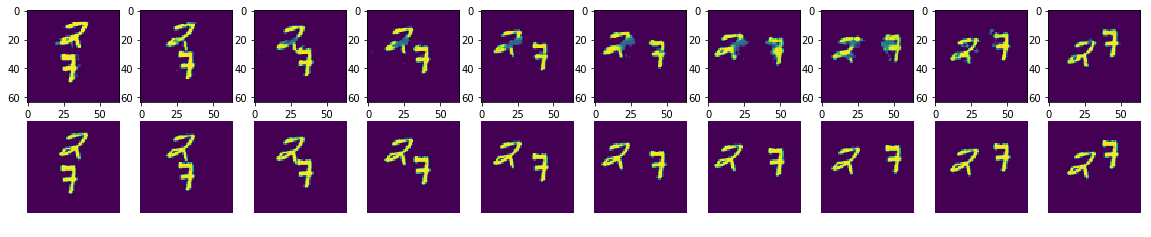

Epoch: 11
Epoch 1/1
9900/9900 [==============================] - 167s 17ms/step - loss: 0.0047


<Figure size 432x288 with 0 Axes>

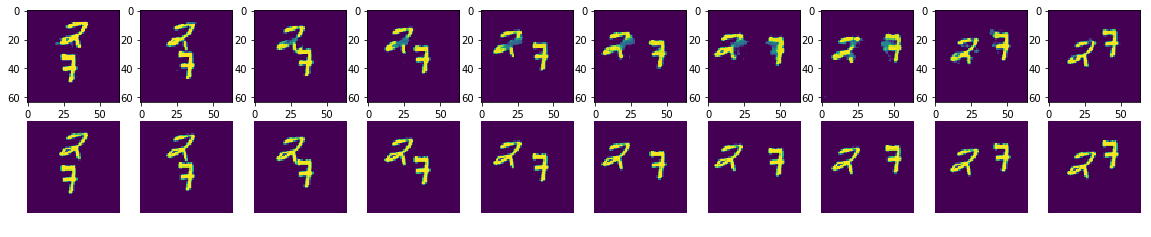

Epoch: 12
Epoch 1/1
9900/9900 [==============================] - 166s 17ms/step - loss: 0.0044


<Figure size 432x288 with 0 Axes>

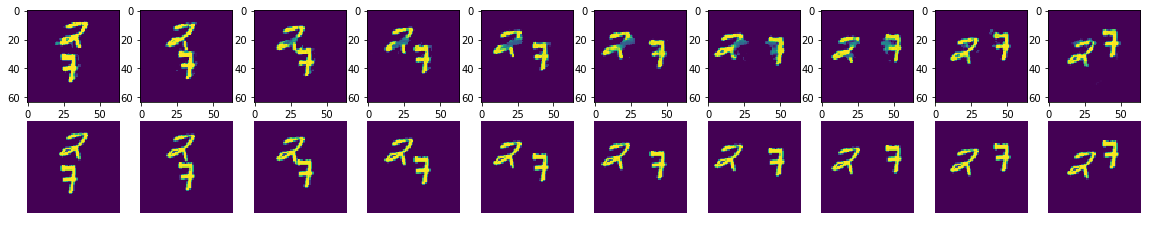

Epoch: 13
Epoch 1/1
9900/9900 [==============================] - 166s 17ms/step - loss: 0.0043


<Figure size 432x288 with 0 Axes>

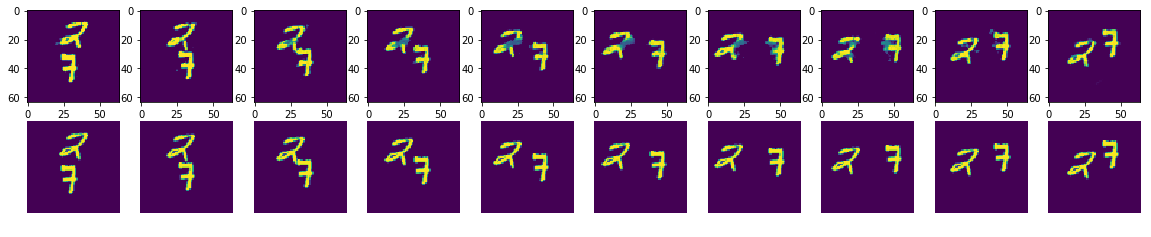

Epoch: 14
Epoch 1/1
9900/9900 [==============================] - 167s 17ms/step - loss: 0.0041


<Figure size 432x288 with 0 Axes>

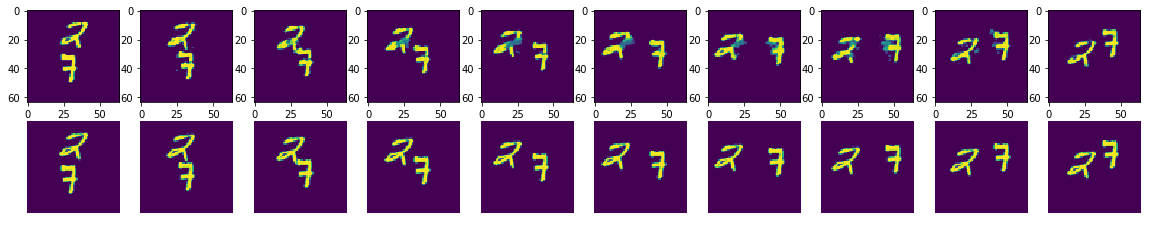

Epoch: 15
Epoch 1/1
9900/9900 [==============================] - 167s 17ms/step - loss: 0.0040


<Figure size 432x288 with 0 Axes>

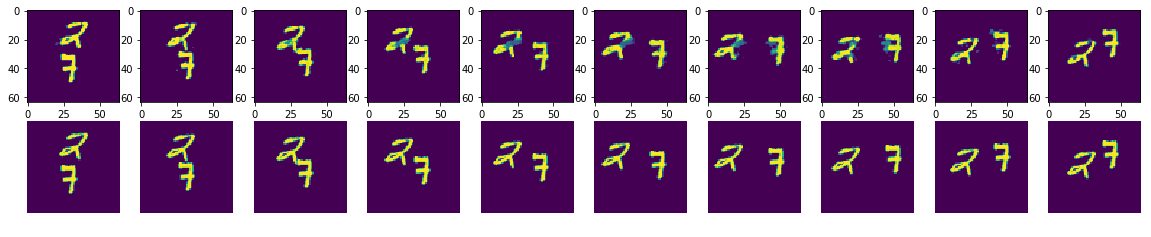

Epoch: 16
Epoch 1/1
9900/9900 [==============================] - 168s 17ms/step - loss: 0.0037


<Figure size 432x288 with 0 Axes>

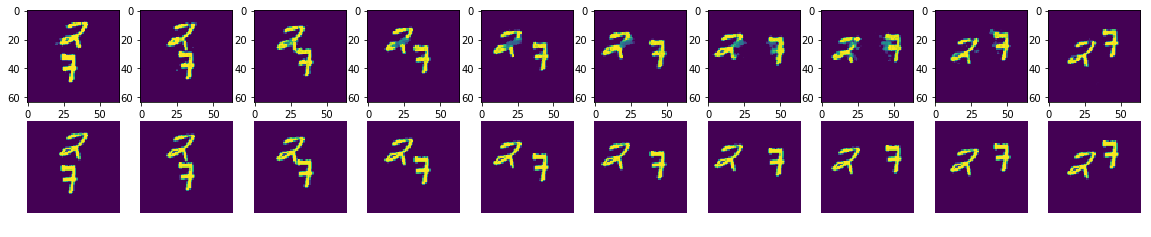

Epoch: 17
Epoch 1/1
 540/9900 [>.............................] - ETA: 2:38 - loss: 0.0038

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [4]:
for epoch in range(1,20):
    print("Epoch:",epoch)
    model.fit(train_in, train_out, batch_size=30, epochs=1)
    
    inputs = test_in[:1, :10]
    ground_truth = test_out[:1, :10]
    predictions = model.predict(inputs)
    predictions = predictions.reshape(10, 64, 64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()

In [6]:
encoder = Sequential()

encoder.add(ConvLSTM2D(filters=8, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True, weights=model.layers[0].get_weights()))
encoder.add(BatchNormalization(weights=model.layers[1].get_weights()))

encoder.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                   padding='same', return_sequences=True, weights=model.layers[2].get_weights()))
encoder.add(BatchNormalization(weights=model.layers[3].get_weights()))

encoder.add(ConvLSTM2D(filters=2, kernel_size=(3, 3),
                   padding='same', return_sequences=False, weights=model.layers[4].get_weights()))
encoder.add(BatchNormalization(weights=model.layers[5].get_weights()))

out_size = (None,64,64,2)
num_repeat = 10

encoder.add(Flatten()) #encoded

encoder.add(RepeatVector(num_repeat))
encoder.add(Reshape(tuple([num_repeat]) + out_size[1:]))

In [5]:
data_test_input = data[100:10000, :10, :, :]
data_test_output = data[100:10000, 10:15, :, :]

data_actual_test_input = data[0:100, :10, :, :]
data_actual_test_output = data[0:100, 10:15, :, :]

# plt.imshow(data_test_input[4][0])
# plt.colorbar()
# plt.show()

#Scaling values between -1 and 1
data_test_input = (data_test_input) / 255.0
data_test_output = (data_test_output) / 255.0
data_actual_test_input = (data_actual_test_input) / 255.0
data_actual_test_output = (data_actual_test_output) / 255.0

#Adding Channels of dimension 1 IMPORTANT if using CNNs
train_in = np.expand_dims(data_test_input, axis=4)
train_out = np.expand_dims(data_test_output, axis=4)
test_in = np.expand_dims(data_actual_test_input, axis=4)
test_out = np.expand_dims(data_actual_test_output, axis=4)

In [6]:
print(train_in[:,1,:,:,:].shape)
print(train_out.shape)

(9900, 64, 64, 1)
(9900, 5, 64, 64, 1)


In [7]:
inputs = test_in[:1, :10]
predictions = encoder2.predict(inputs)
print(predictions.shape)

(1, 5, 64, 64, 2)


In [8]:
encoded_train_in = encoder2.predict(train_in[:,:10])
encoded_test_in = encoder2.predict(test_in[:,:10])

In [9]:
forecaster = Sequential()
forecaster.add(ConvLSTM2D(filters=128, kernel_size=(5, 5),
                   input_shape=(5, 64, 64, 2),
                   padding='same', return_sequences=True))
forecaster.add(BatchNormalization())

forecaster.add(ConvLSTM2D(filters=64, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
forecaster.add(BatchNormalization())

forecaster.add(ConvLSTM2D(filters=64, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
forecaster.add(BatchNormalization())

# forecaster.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
#                    input_shape=(10, 64, 64, 1),
#                    padding='same', return_sequences=True))
# forecaster.add(BatchNormalization())

forecaster.add(TimeDistributed(Conv2D(filters=1,kernel_size=(1,1),padding='same',activation='sigmoid')))


ssim = DSSIMObjective(kernel_size=3)
def loss_combined(y_true, y_pred):
    l = keras.losses.mean_squared_error(y_true, y_pred)
    print(y_pred[:,0,:,:,:].shape)
    for i in range(5):
        l +=(ssim.__call__(y_true[:,i,:,:,:], y_pred[:,i,:,:,:])/45)
    return l

forecaster.compile(loss=loss_combined, optimizer='adam')
forecaster.summary()

(?, 64, 64, 1)
Instructions for updating:
ksizes is deprecated, use sizes instead

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_4 (ConvLSTM2D)  (None, 5, 64, 64, 128)    1664512   
_________________________________________________________________
batch_normalization_4 (Batch (None, 5, 64, 64, 128)    512       
_________________________________________________________________
conv_lst_m2d_5 (ConvLSTM2D)  (None, 5, 64, 64, 64)     442624    
_________________________________________________________________
batch_normalization_5 (Batch (None, 5, 64, 64, 64)     256       
_________________________________________________________________
conv_lst_m2d_6 (ConvLSTM2D)  (None, 5, 64, 64, 64)     295168    
_________________________________________________________________
batch_normalization_6 (Batch (None, 5, 64, 64, 64)     256       
_____________________________________

In [44]:
for epoch in range(1,251):
    print("Epoch:",epoch)
    forecaster.fit(encoded_train_in, train_out, batch_size=10, epochs=1)
    if epoch%10==0:
        forecaster.save('5forecaster'+str(epoch)+'.h5')
    
    inputs = encoded_test_in[:1, :10]
    ground_truth = test_out[:1, :5]
    predictions = forecaster.predict(inputs)
    predictions = predictions.reshape(5, 64, 64)
    ground_truth = ground_truth.reshape(5, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()
    
#     if epoch % 4 == 0:
#         model3.save('multiframeconvlstm_epoch'+str(epoch)+'.h5')
    print('-----------------------------------')

Epoch: 1
Epoch 1/1
 130/9900 [..............................] - ETA: 6:23 - loss: 0.0245

KeyboardInterrupt: 

In [4]:
encoder2 = Sequential()

encoder2.add(ConvLSTM2D(filters=8, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True, weights=encoder.layers[0].get_weights()))
encoder2.add(BatchNormalization(weights=encoder.layers[1].get_weights()))

encoder2.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                   padding='same', return_sequences=True, weights=encoder.layers[2].get_weights()))
encoder2.add(BatchNormalization(weights=encoder.layers[3].get_weights()))

encoder2.add(ConvLSTM2D(filters=2, kernel_size=(3, 3),
                   padding='same', return_sequences=False, weights=encoder.layers[4].get_weights()))
encoder2.add(BatchNormalization(weights=encoder.layers[5].get_weights()))

out_size = (None,64,64,2)
num_repeat = 5

encoder2.add(Flatten()) #encoded

encoder2.add(RepeatVector(num_repeat))
encoder2.add(Reshape(tuple([num_repeat]) + out_size[1:]))

In [15]:
forecaster.layers

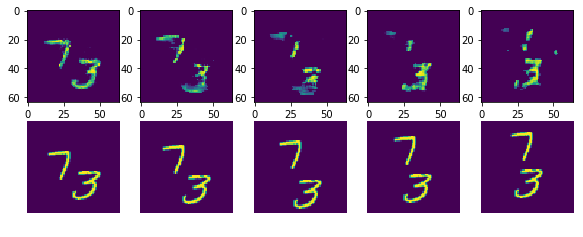

<Figure size 432x288 with 0 Axes>

In [52]:
inputs = encoded_train_in[572:573, :10]
ground_truth = train_out[572:573, :5]
predictions = forecaster.predict(inputs)
predictions = predictions.reshape(5, 64, 64)
ground_truth = ground_truth.reshape(5, 64, 64)
plt.figure(figsize=(20, 20))
for i in range(predictions.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(predictions[i], interpolation='nearest')
    plt.subplot(10, 10, 10+i+1)
    plt.imshow(ground_truth[i], interpolation='nearest')
    plt.axis('off')
plt.show()
plt.tight_layout()

In [3]:
forecaster = keras.models.load_model('forecaster.h5')
encoder = keras.models.load_model('encoder.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/home/volkovskyi/.local/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [16]:
encoder.save('encoder.h5')
forecaster.save('forecaster.h5')

In [3]:
from keras_contrib.losses import DSSIMObjective
forecaster2 = Sequential()
forecaster2.add(ConvLSTM2D(filters=24, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 2),
                   padding='same', return_sequences=True, weights=forecaster.layers[0].get_weights()))
forecaster2.add(BatchNormalization(weights=forecaster.layers[1].get_weights()))
print('done')
forecaster2.add(ConvLSTM2D(filters=24, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True, weights=forecaster.layers[2].get_weights()))
forecaster2.add(BatchNormalization(weights=forecaster.layers[3].get_weights()))

forecaster2.add(ConvLSTM2D(filters=24, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True, weights=forecaster.layers[4].get_weights()))
forecaster2.add(BatchNormalization(weights=forecaster.layers[5].get_weights()))

forecaster2.add(ConvLSTM2D(filters=24, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True, weights=forecaster.layers[6].get_weights()))
forecaster2.add(BatchNormalization(weights=forecaster.layers[7].get_weights()))

forecaster2.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   input_shape=(10, 64, 64, 1),
                   padding='same', return_sequences=True, activation='sigmoid', weights=forecaster.layers[8].get_weights()))
print('done')
ssim = DSSIMObjective(kernel_size=3)
def loss_combined(y_true, y_pred):
    l = keras.losses.mean_squared_error(y_true, y_pred)
    for i in range(y_pred.shape[1]):
        l +=(ssim.__call__(y_true[:,i,:,:,:], y_pred[:,i,:,:,:])/24)
    return l

forecaster2.compile(loss=loss_combined, optimizer='adam')
forecaster2.summary()

done
done
Instructions for updating:
ksizes is deprecated, use sizes instead

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_1 (ConvLSTM2D)  (None, 10, 64, 64, 24)    22560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 64, 64, 24)    96        
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 10, 64, 64, 24)    41568     
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 64, 64, 24)    96        
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 10, 64, 64, 24)    41568     
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 64, 64, 24)    96        
__________________________________________

Epoch: 1
Epoch 1/1
9900/9900 [==============================] - 316s 32ms/step - loss: 0.1133


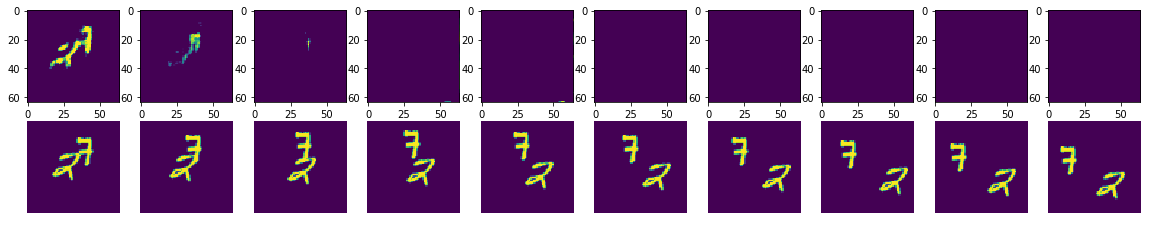

-----------------------------------
Epoch: 2
Epoch 1/1
9900/9900 [==============================] - 307s 31ms/step - loss: 0.1102


<Figure size 432x288 with 0 Axes>

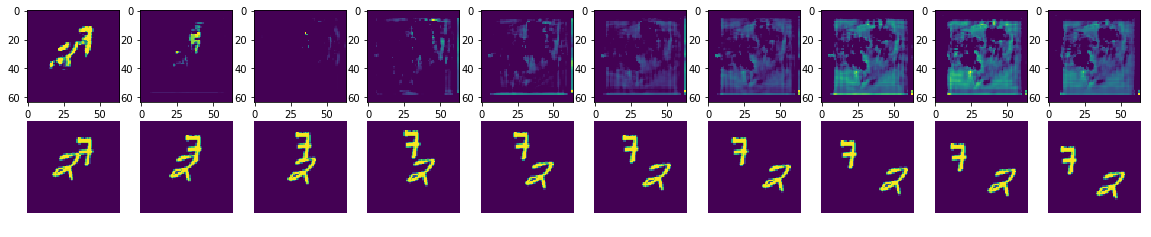

-----------------------------------
Epoch: 3
Epoch 1/1
9900/9900 [==============================] - 307s 31ms/step - loss: 0.1101


<Figure size 432x288 with 0 Axes>

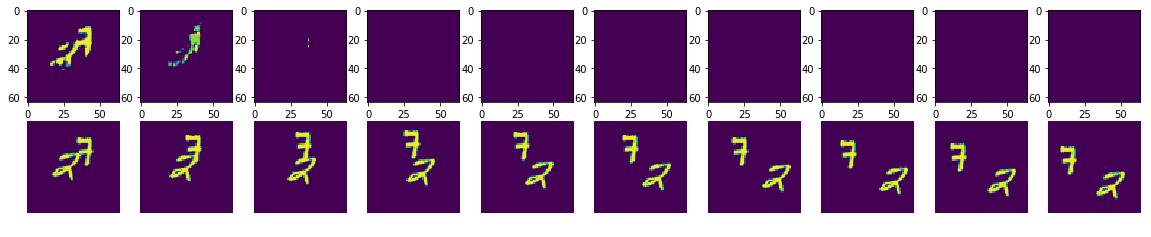

-----------------------------------
Epoch: 4
Epoch 1/1
8520/9900 [========================>.....] - ETA: 42s - loss: 0.1100

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [8]:
for epoch in range(1,251):
    print("Epoch:",epoch)
    forecaster2.fit(encoded_train_in, train_out, batch_size=10, epochs=1)
    
    inputs = encoded_test_in[:1, :10]
    ground_truth = test_out[:1, :10]
    predictions = forecaster2.predict(inputs)
    predictions = predictions.reshape(10, 64, 64)
    ground_truth = ground_truth.reshape(10, 64, 64)
    plt.figure(figsize=(20, 20))
    for i in range(predictions.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(predictions[i], interpolation='nearest')
        plt.subplot(10, 10, 10+i+1)
        plt.imshow(ground_truth[i], interpolation='nearest')
        plt.axis('off')
    plt.show()
    plt.tight_layout()
    
#     if epoch % 4 == 0:
#         model3.save('multiframeconvlstm_epoch'+str(epoch)+'.h5')
    print('-----------------------------------')

In [11]:
!ls

 5frameforecaster.h5		   'MNIST Encoder.ipynb'
'CIFAR Autoencoder.ipynb'	    mnist_test_seq.npy
'Convolutional Autoencoder.ipynb'   model.h5
 encoder.h5			    MovingMNISTCNNLSTM.ipynb
 forecaster2ssim.h5		    MovingMNIST-ConvLSTM-autoencoder.ipynb
 forecaster.h5


In [41]:
forecaster.save('5frameforecaster.h5')

In [13]:
forecaster = keras.models.load_model('5frameforecaster.h5')

ValueError: Initializer for variable conv_lst_m2d_20_2/bias/ is from inside a control-flow construct, such as a loop or conditional. When creating a variable inside a loop or conditional, use a lambda as the initializer.

In [43]:
forecaster.save('final5frameforecast.h5')